THE SPARKS FOUNDATION

PREDICTION USING SUPERVISED LEARNING



In [2]:
#Importing the neccessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#Reading the data from the csv file.abs
data = pd.read_csv('student_scores - student_scores.csv')
print ('Data imported successfully')

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


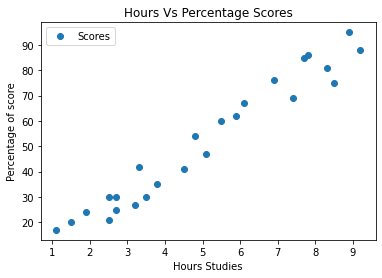

In [11]:
#Creating a 2D plot for the data
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours Vs Percentage Scores')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage of score')
plt.show()

We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [26]:
#Allocating the data to the axis
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x,y 

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

Now, we will use the scikit-learn's built in test_train_split function to divide the data into training and test data sets. 

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print ('The training of the linear model is done')

The training of the linear model is done


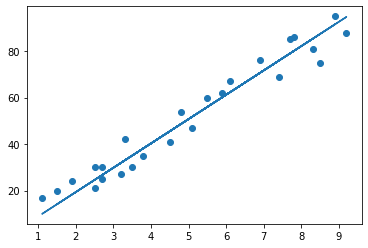

In [31]:
#Plotting the regression line
line = regressor.coef_*x + regressor.intercept_

plt.scatter(x,y)
plt.plot(x, line);
plt.show() 

MAKING PREDICTIONS

In [48]:
print (x_test) #Hours
y_predict = regressor.predict(x_test) #predict the scores on x_test data
df = pd.DataFrame({'Hours studied': x_test.reshape(-1), 'Actual': y_test , 'Predicted': y_predict})
df 

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


,Hours studied,Actual,Predicted
0,1.1,17,9.970262
1,3.3,42,32.984700
2,1.9,24,18.339148
3,8.5,75,87.382463
4,4.8,54,48.676362


In [57]:
#Testing with new data provided by user
new_Hours = input('Number of hours: ')
new_score_predicted = regressor.predict([[new_Hours]])
print("Number of Hours = {}".format(new_Hours))
print("Predicted Score = {}".format(new_score_predicted[0]))

Number of Hours = 9.25
Predicted Score = 95.22829438402952


EVALUATING THE MODEL

In [63]:
from sklearn import metrics
print ('Mean Absolute Eror:', metrics.mean_absolute_error(y_test, y_predict))
print ("Root Mean Sqaure Error:", np.sqrt(metrics.mean_absolute_error(y_test, y_predict)))
print ("Mean Squared Error:", metrics.mean_squared_error(y_test, y_predict))

Mean Absolute Eror: 7.882398086270432
Root Mean Sqaure Error: 2.8075608784620205
Mean Squared Error: 68.88092074277635


TASK 1 COMPLETED

THANK YOU